# Project 2 DMT Group 28 2018

Changxin Miao 11853018 cmo440

Michael Mo 10770518 mmo740

Féliciën Veldema 10739335 Fva350



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import tseries
from pathlib import Path
from scipy import stats

# Data Analysis / Preparation

In [2]:
#LOAD The data
path = 'Data Mining VU data/training_set_VU_DM_2014.csv'
#path = 'lines_1_mil.csv'
df = pd.read_csv(path, sep=',')

#unique search ids
srch_ids = df.srch_id.unique()
features = df.columns.tolist()
#entries = len(df.date_time.count())
entries = df.date_time.count()

print(features)
print(srch_ids)

['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'click_b

In [3]:
#STATUS PRINTS      #NOTE before cleaning
print("STATISTICS")
print("The amount of unique search ids are: ", len(srch_ids), "\n")
print("\nThe variables used are:\n", features)

##NOTE COMMENTED DUE TO LARGE AMOUNT
# print("\nHow many data points per id:")
# datalist = []
# for i in srch_ids:
#     datalist.append(len(df.loc[df['srch_id'] == i]))
#     print("Search id: ", i ," amount of data inputs: ", len(df.loc[df['srch_id'] == i]))
###

print("\nAmount of data rows: ", entries)

df.describe(include='all')

STATISTICS
The amount of unique search ids are:  199795 


The variables used are:
 ['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4958347,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
unique,NaN,198615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-11-02 14:04:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.663666e+05,NaN,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,NaN,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,NaN,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,NaN,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,NaN,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00


In [7]:
len(df['price_usd'].unique())

76465

In [8]:
time_min = df['date_time'].min()
time_max = df['date_time'].max()
print("Data time span is from: " + str(time_min) + " to " + str(time_max))

Data time span is from: 2012-11-01 00:08:29 to 2013-06-30 23:58:24


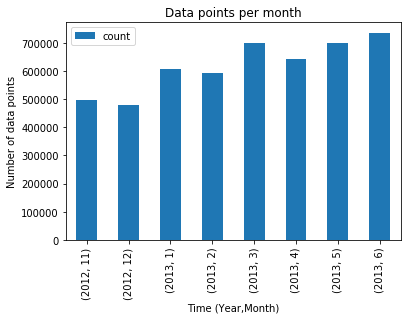

In [5]:
df_dt2 = df
df_dt2['dt2'] = pd.to_datetime(df['date_time'])
df_dt2['srch_id'].groupby(by=[df_dt2.dt2.dt.year,df_dt2.dt2.dt.month]).agg({'count'}).plot(kind="bar")
plt.xlabel('Time (Year,Month)')
plt.ylabel('Number of data points')
plt.title("Data points per month")
plt.show()

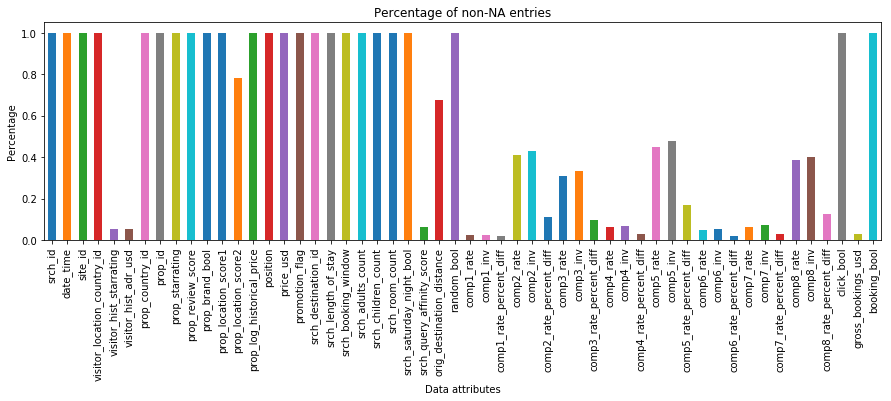

In [9]:
plt.figure(figsize=(15,4))
(df.count()/df.shape[0]).plot(kind="bar")
plt.xlabel('Data attributes')
plt.ylabel('Percentage')
plt.title("Percentage of non-NA entries")
plt.show()

In [7]:
# This shows that not at each position a hotel is shown
num_rows = []
for k in range(0,15):
    df_s1 = df.loc[df['srch_id'] == k]
    if df_s1.shape[0] != 0:
        num_rows.append(( k, df_s1.shape[0] , df_s1['position'].min(), df_s1['position'].max() ) )
num_rows

[(1, 28, 1, 37),
 (4, 32, 1, 36),
 (6, 5, 1, 6),
 (8, 21, 1, 25),
 (11, 33, 1, 37),
 (12, 28, 1, 32)]

In [10]:
# Check the list order of how the hotel properties were shown.
df_ord = df[['srch_id','random_bool','position','click_bool','booking_bool']]
df_ran_ord = df_ord.loc[df['random_bool'] == 1]
df_nor_ord = df_ord.loc[df['random_bool'] == 0]
print("Number of data points where random ordering was used: " + str(df_ran_ord.shape[0]))
print("Number of data points where normal ordering was used: " + str(df_nor_ord.shape[0]))
max_pos_ran = df_ran_ord['position'].max()
max_pos_nor = df_nor_ord['position'].max()
print("Max position found for a random ordering: " + str(max_pos_ran))
print("Max position found for a normal ordering: " + str(max_pos_nor))

Number of data points where random ordering was used: 1467177
Number of data points where normal ordering was used: 3491170
Max position found for a random ordering: 40
Max position found for a normal ordering: 40


In [11]:
ran_ord_pos_tot_counts = df_ran_ord['position'].value_counts().sort_index(ascending=False)
nor_ord_pos_tot_counts = df_nor_ord['position'].value_counts().sort_index(ascending=False)

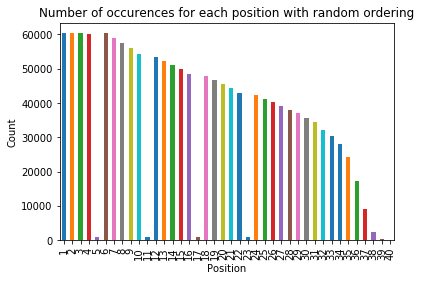

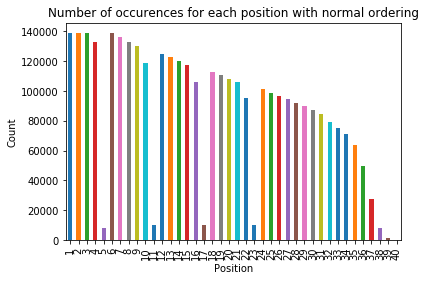

In [10]:
ran_ord_pos_tot_counts[::-1].plot(kind="bar")
plt.xlabel('Position')
plt.ylabel('Count')
plt.title("Number of occurences for each position with random ordering")
plt.show()
nor_ord_pos_tot_counts[::-1].plot(kind="bar")
plt.xlabel('Position')
plt.ylabel('Count')
plt.title("Number of occurences for each position with normal ordering")
plt.show()

In [12]:
# Count number of clicks, and bookings for random and normal orderings respectively.
ran_ord_CB_counts = np.zeros((3,max_pos_ran))
for name,group in df_ran_ord.groupby(by='position'):
    ran_ord_CB_counts[0][name-1] = group.shape[0]
    ran_ord_CB_counts[1][name-1] = group['click_bool'].sum()
    ran_ord_CB_counts[2][name-1] = group['booking_bool'].sum()
    
nor_ord_CB_counts = np.zeros((3,max_pos_nor))
for name,group in df_nor_ord.groupby(by='position'):
    nor_ord_CB_counts[0][name-1] = group.shape[0]
    nor_ord_CB_counts[1][name-1] = group['click_bool'].sum()
    nor_ord_CB_counts[2][name-1] = group['booking_bool'].sum()

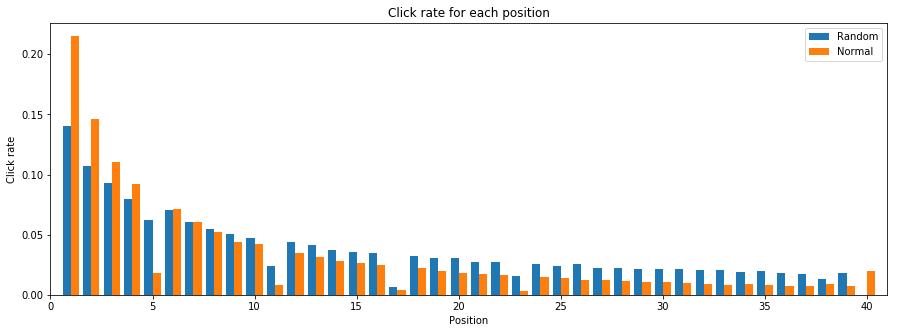

In [15]:
#plt.bar(np.arange(0,max_pos_nor), ran_ord_CB_counts[1] / ran_ord_CB_counts[0])
x=1+np.arange(0,max_pos_nor)
plt.figure(figsize=(15,5))
plt.bar(x-0.2, ran_ord_CB_counts[1] / ran_ord_CB_counts[0], width=0.4, label='Random')
plt.bar(x+0.2, nor_ord_CB_counts[1] / nor_ord_CB_counts[0], width=0.4, label='Normal')
plt.xlabel('Position')
plt.xlim([0,1+len(x)])
plt.ylabel('Click rate')
plt.title("Click rate for each position")
plt.legend(loc='upper right')
plt.show()

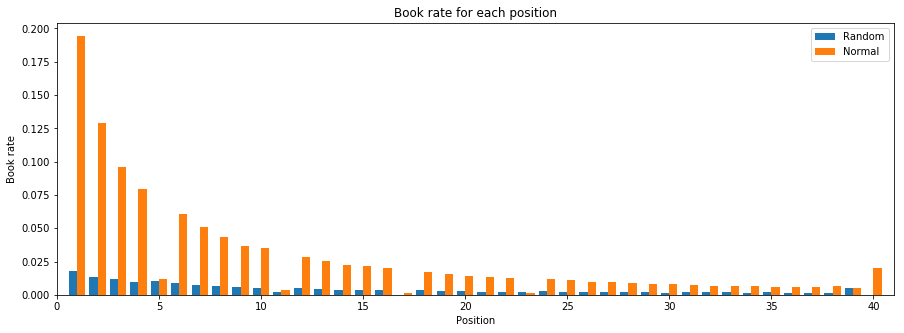

In [17]:
#plt.bar(np.arange(0,max_pos_nor), ran_ord_CB_counts[1] / ran_ord_CB_counts[0])
x=1+np.arange(0,max_pos_nor)
plt.figure(figsize=(15,5))
plt.bar(x-0.2, ran_ord_CB_counts[2] / ran_ord_CB_counts[0], width=0.4, label='Random')
plt.bar(x+0.2, nor_ord_CB_counts[2] / nor_ord_CB_counts[0], width=0.4, label='Normal')
plt.xlabel('Position')
plt.xlim([0,1+len(x)])
plt.ylabel('Book rate')
plt.title("Book rate for each position")
plt.legend(loc='upper right')
plt.show()

/home/michael/anaconda3/envs/dm/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


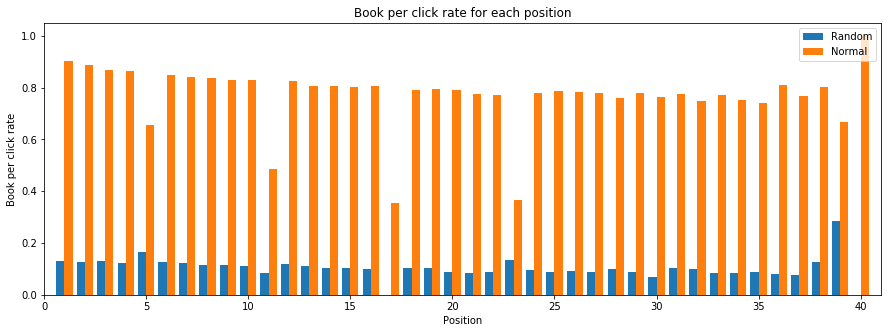

In [18]:
#plt.bar(np.arange(0,max_pos_nor), ran_ord_CB_counts[1] / ran_ord_CB_counts[0])
x=1+np.arange(0,max_pos_nor)
plt.figure(figsize=(15,5))
plt.bar(x-0.2, ran_ord_CB_counts[2] / ran_ord_CB_counts[1], width=0.4, label='Random')
plt.bar(x+0.2, nor_ord_CB_counts[2] / nor_ord_CB_counts[1], width=0.4, label='Normal')
plt.xlabel('Position')
plt.xlim([0,1+len(x)])
plt.ylabel('Book per click rate')
plt.title("Book per click rate for each position")
plt.legend(loc='upper right')
plt.show()

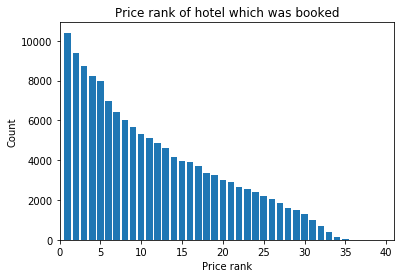

In [19]:
# We check for all srch_ids: If there was a booking made, then the hotel booked had some price.
# If we all hotels shown on price from cheap to expensive. What rank was the hotel then?

max_position = df['position'].max()
counts_book_pos = np.zeros(max_position)
#print(max_position)

for name,group in df[['srch_id','price_usd','booking_bool']].groupby(by='srch_id'):
    # There is a booking
    group = group.sort_values(by=['price_usd']) # Could be a tie -> no need to do anything, since we look at long run
    if group['booking_bool'].sum() == 1:
        price_rank = np.where(group['booking_bool']==1)[0]  # Rank starts from 0
        counts_book_pos[price_rank] = counts_book_pos[price_rank] + 1
    
#print(counts_book_pos)
plt.bar(np.arange(1,1+max_position), counts_book_pos)
plt.xlabel('Price rank')
plt.xlim([0,1+len(counts_book_pos)])
plt.ylabel('Count')
plt.title("Price rank of hotel which was booked")
plt.show()

/home/michael/anaconda3/envs/dm/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


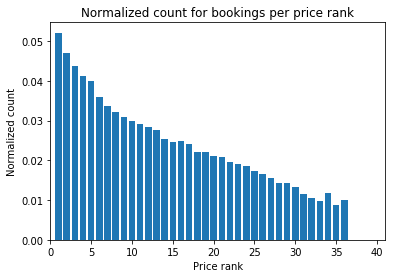

In [20]:
# We check for all srch_ids: If there was a booking made, then the hotel booked had some price.
# If we all hotels shown on price from cheap to expensive. What rank was the hotel then?

max_position = df['position'].max()
counts_book_pos = np.zeros(max_position)
counts_pos = np.zeros(max_position)
#print(max_position)

for name,group in df[['srch_id','price_usd','booking_bool']].groupby(by='srch_id'):
    # There is a booking
    group = group.sort_values(by=['price_usd']) # Could be a tie -> no need to do anything, since we look at long run
    if group['booking_bool'].sum() == 1:
        price_rank = np.where(group['booking_bool']==1)[0]  # Rank starts from 0
        counts_book_pos[price_rank] = counts_book_pos[price_rank] + 1
        
    for k in range(0,group.shape[0]):
        counts_pos[k] = counts_pos[k]+1
    
#print(counts_book_pos)
plt.bar(np.arange(1,1+max_position), counts_book_pos / counts_pos)
plt.xlabel('Price rank')
plt.xlim([0,1+len(counts_book_pos)])
plt.ylabel('Normalized count')
plt.title("Normalized count for bookings per price rank")
plt.show()

In [ ]:
# We check whether the price differs, when we consider where the hotel is located

In [15]:
print("Number of searches is: " + str(len(df['srch_id'].unique())))
print("Number of hotel countries is: " + str(len(df['prop_country_id'].unique())))

Number of searches is: 199795
Number of hotel countries is: 172


In [16]:
df_one_per_SID = df.groupby(by='srch_id').first()
#df_x = df.groupby('srch_id').apply(lambda df : df.sample(1))

# Below is with when counting double, for top ~15 gives same result, but it could have been different
# df['prop_country_id'].value_counts()

In [22]:
top10_PC_ID = df_one_per_SID['prop_country_id'].value_counts()[0:10].keys()
print(top10_PC_ID)

Int64Index([219, 100, 55, 31, 99, 129, 215, 220, 59, 216], dtype='int64')


In [23]:
df_one_per_SID[['prop_country_id','price_usd']];

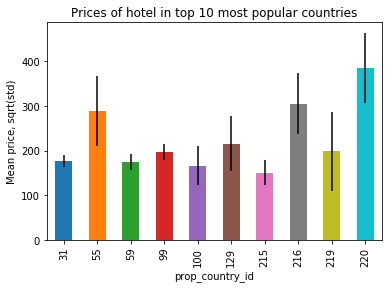

In [24]:
df_by_PC_ID = df[df['prop_country_id'].isin(top10_PC_ID)].groupby(by='prop_country_id')['price_usd']

mean_prices = df_by_PC_ID.mean()
std_prices = df_by_PC_ID.std()

mean_prices.plot(kind='bar', yerr=np.sqrt(std_prices)) # !!! reason sqrt is so std stays "in scale"
plt.xlabel('prop_country_id')
plt.ylabel('Mean price, sqrt(std)')
plt.title("Prices of hotel in top 10 most popular countries")
plt.show()

In [1]:
#df_by_PC_ID = df[df['prop_country_id'].isin(top5_PC_ID)].groupby(by='prop_country_id')['price_usd']

#df_by_PC_ID = df_by_PC_ID.loc[df_by_PC_ID['prop_country_id'].isin(top5_PC_ID)]
#df_by_PC_ID.describe()

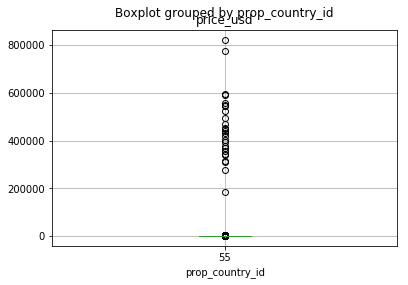

In [62]:
#df_top5_PC_ID.boxplot(column='price_usd', by='prop_country_id')
#plt.show()